In [1]:
import numpy as np
from pymab.policies.greedy import GreedyPolicy
from pymab.policies.epsilon_greedy import EpsilonGreedyPolicy
from pymab.policies.ucb import UCBPolicy
from pymab.policies.thomson_sampling import ThomsonSamplingPolicy
from pymab.game import Game

In [2]:
# Define Q-values, which are the true values of the bandits
#Q_values = np.array([0.1, 0.5, -0.2, 0.4, 0.7, 0.45, 0.3, 0.2, 0.05, -0.1])
n_bandits = 10

# Initialize the policies to compare
greedy_policy = GreedyPolicy(n_bandits=n_bandits,
                            optimistic_initilization=0)

greedy_policy_optimistic_initialization_1 = GreedyPolicy(n_bandits=n_bandits,
                                                       optimistic_initilization=1)

greedy_policy_optimistic_initialization_5 = GreedyPolicy(n_bandits=n_bandits,
                                                       optimistic_initilization=5)

epsilon_greedy_policy_0_01 = EpsilonGreedyPolicy(n_bandits=n_bandits,
                                         epsilon=0.01)

epsilon_greedy_policy_0_1 = EpsilonGreedyPolicy(n_bandits=n_bandits,
                                         epsilon=0.1)

epsilon_greedy_policy_0_5 = EpsilonGreedyPolicy(n_bandits=n_bandits,
                                         epsilon=0.5)

ucb_policy_0 = UCBPolicy(n_bandits=n_bandits,
                      c=0)

ucb_policy_1 = UCBPolicy(n_bandits=n_bandits,
                      c=1)

ucb_policy_2 = UCBPolicy(n_bandits=n_bandits,
                      c=2)

thomson_sampling = ThomsonSamplingPolicy(n_bandits=n_bandits)

In [ ]:
# Setup the game
game = Game(n_episodes=2000, 
            n_steps=1000, 
            policies=[greedy_policy,
                    greedy_policy_optimistic_initialization_1,
                    greedy_policy_optimistic_initialization_5,
                    epsilon_greedy_policy_0_01,
                    epsilon_greedy_policy_0_1,
                    epsilon_greedy_policy_0_5,
                    ucb_policy_0,
                    ucb_policy_1,
                    ucb_policy_2,
                    thomson_sampling
                ], 
            n_bandits=n_bandits,
            is_stationary=False
            )

# Run the game
game.game_loop()

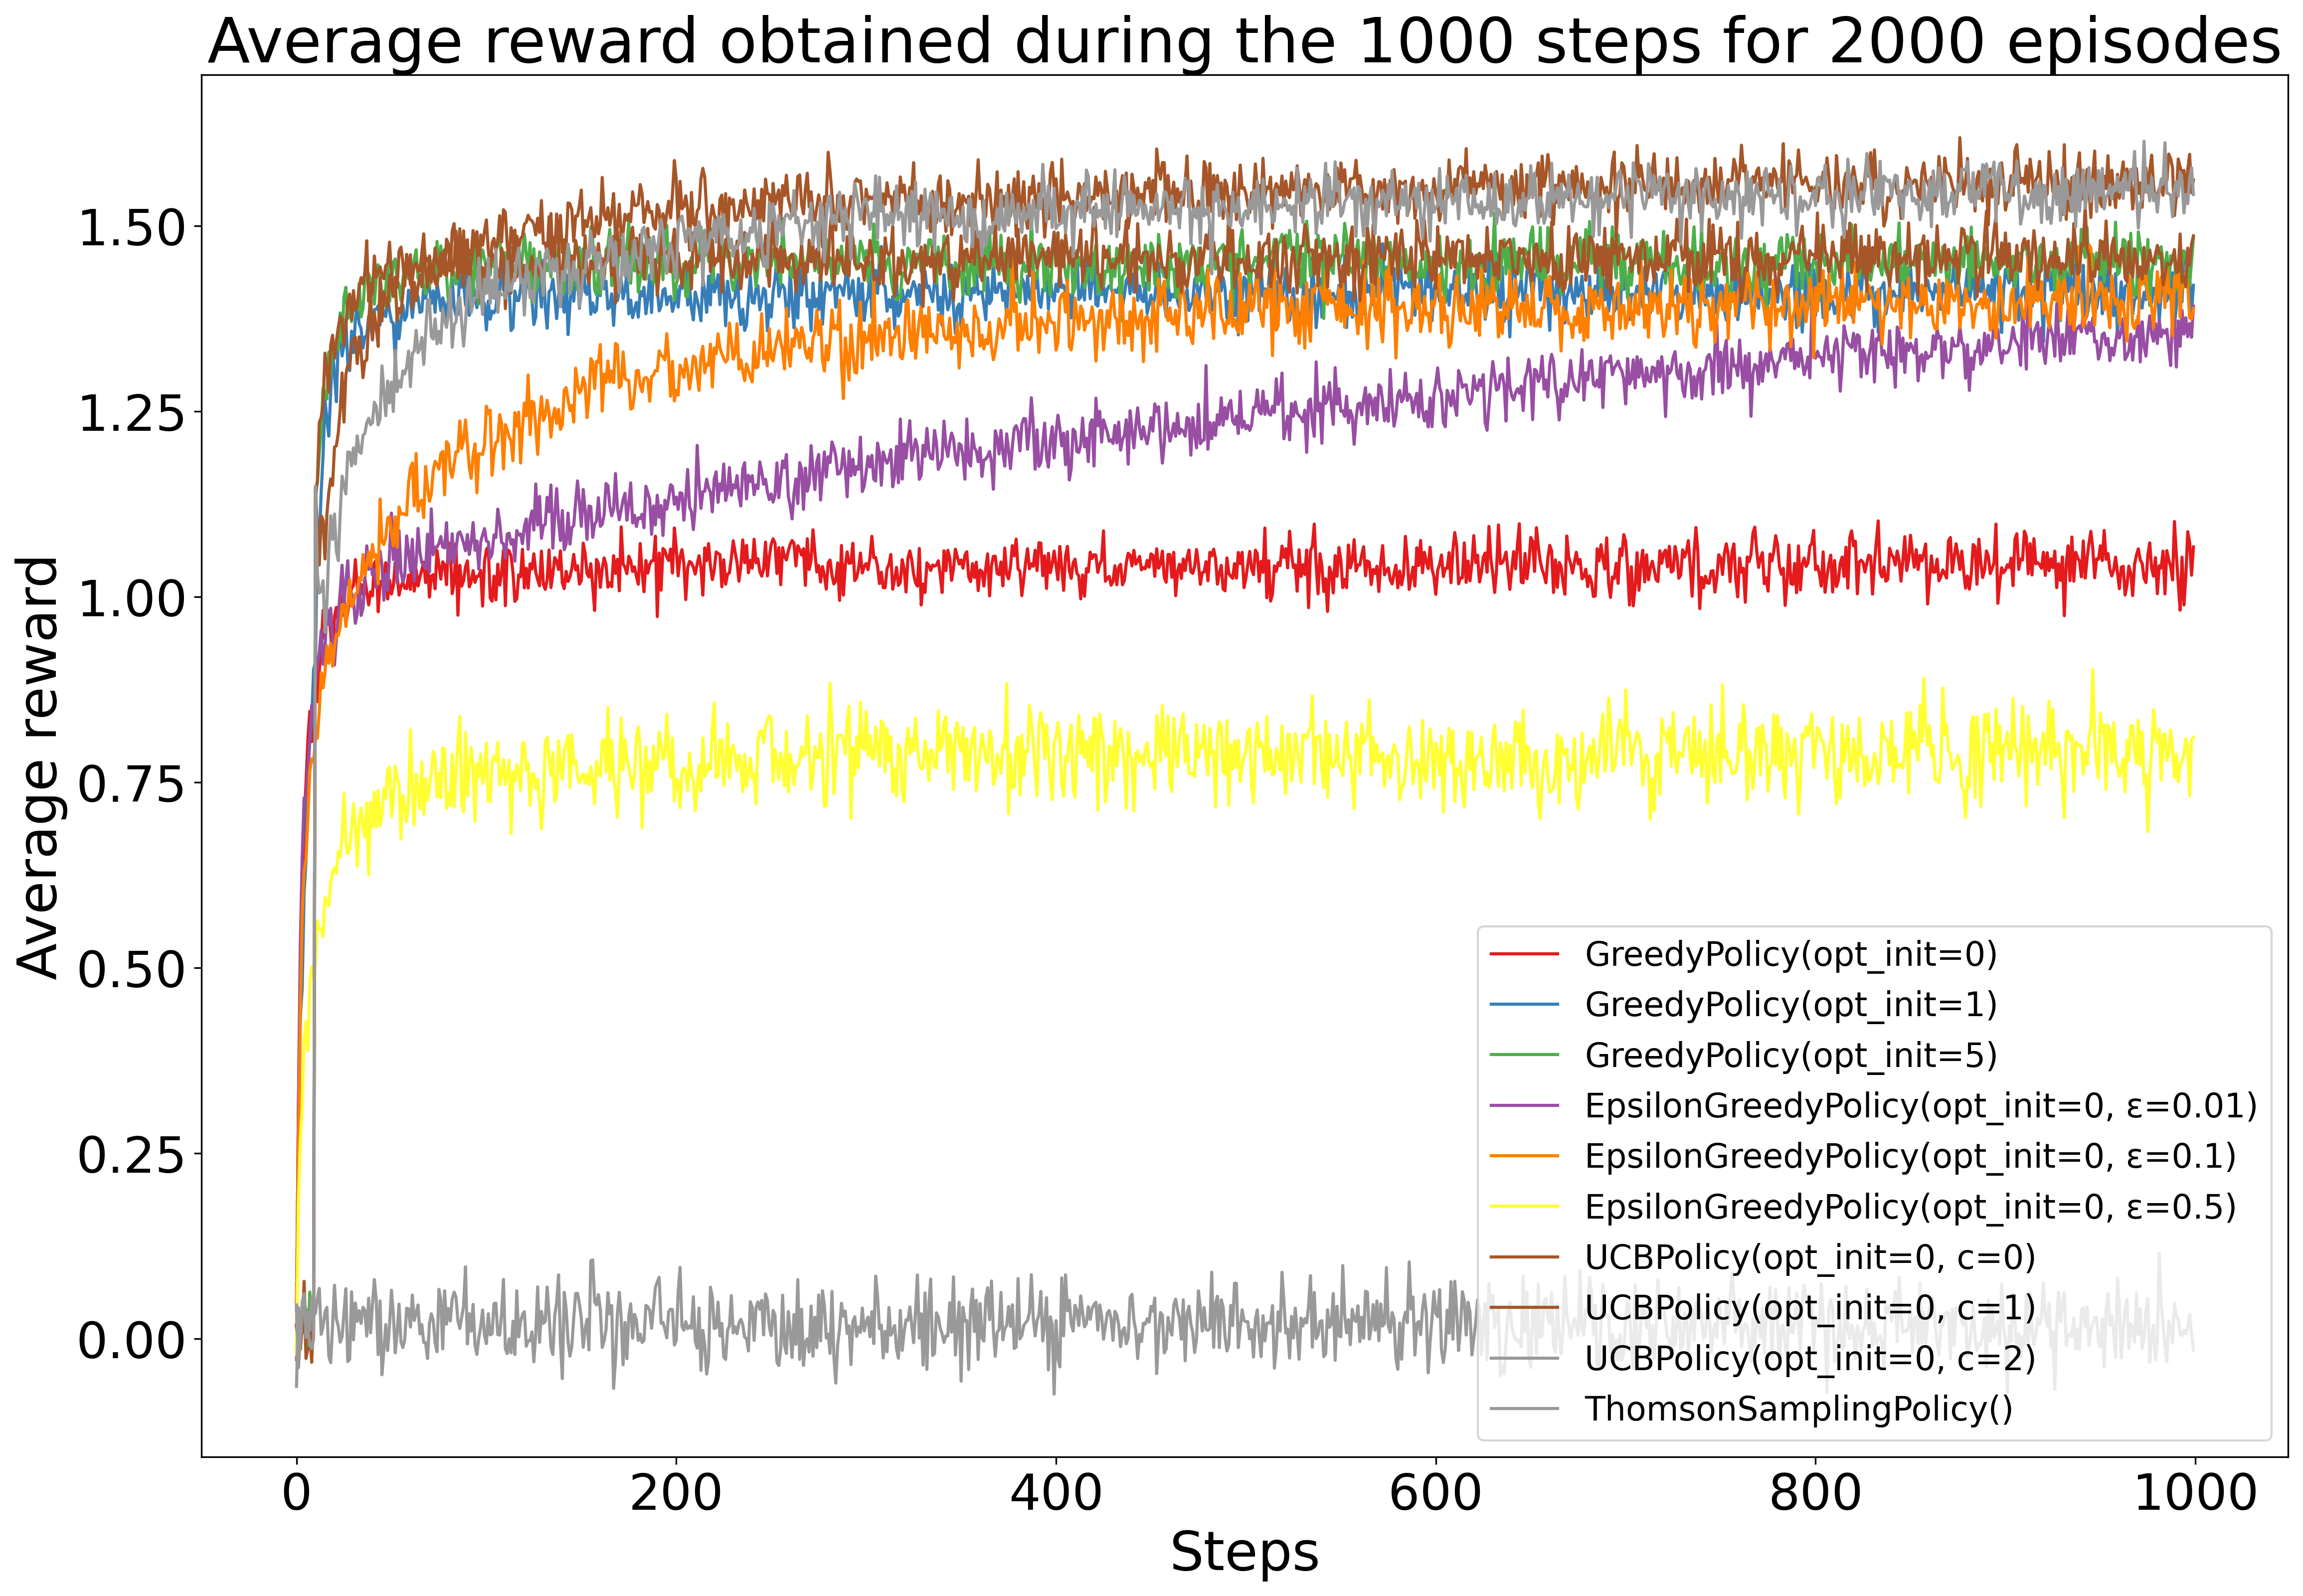

In [3]:
# Plot the results
game.plot_average_reward_by_step()

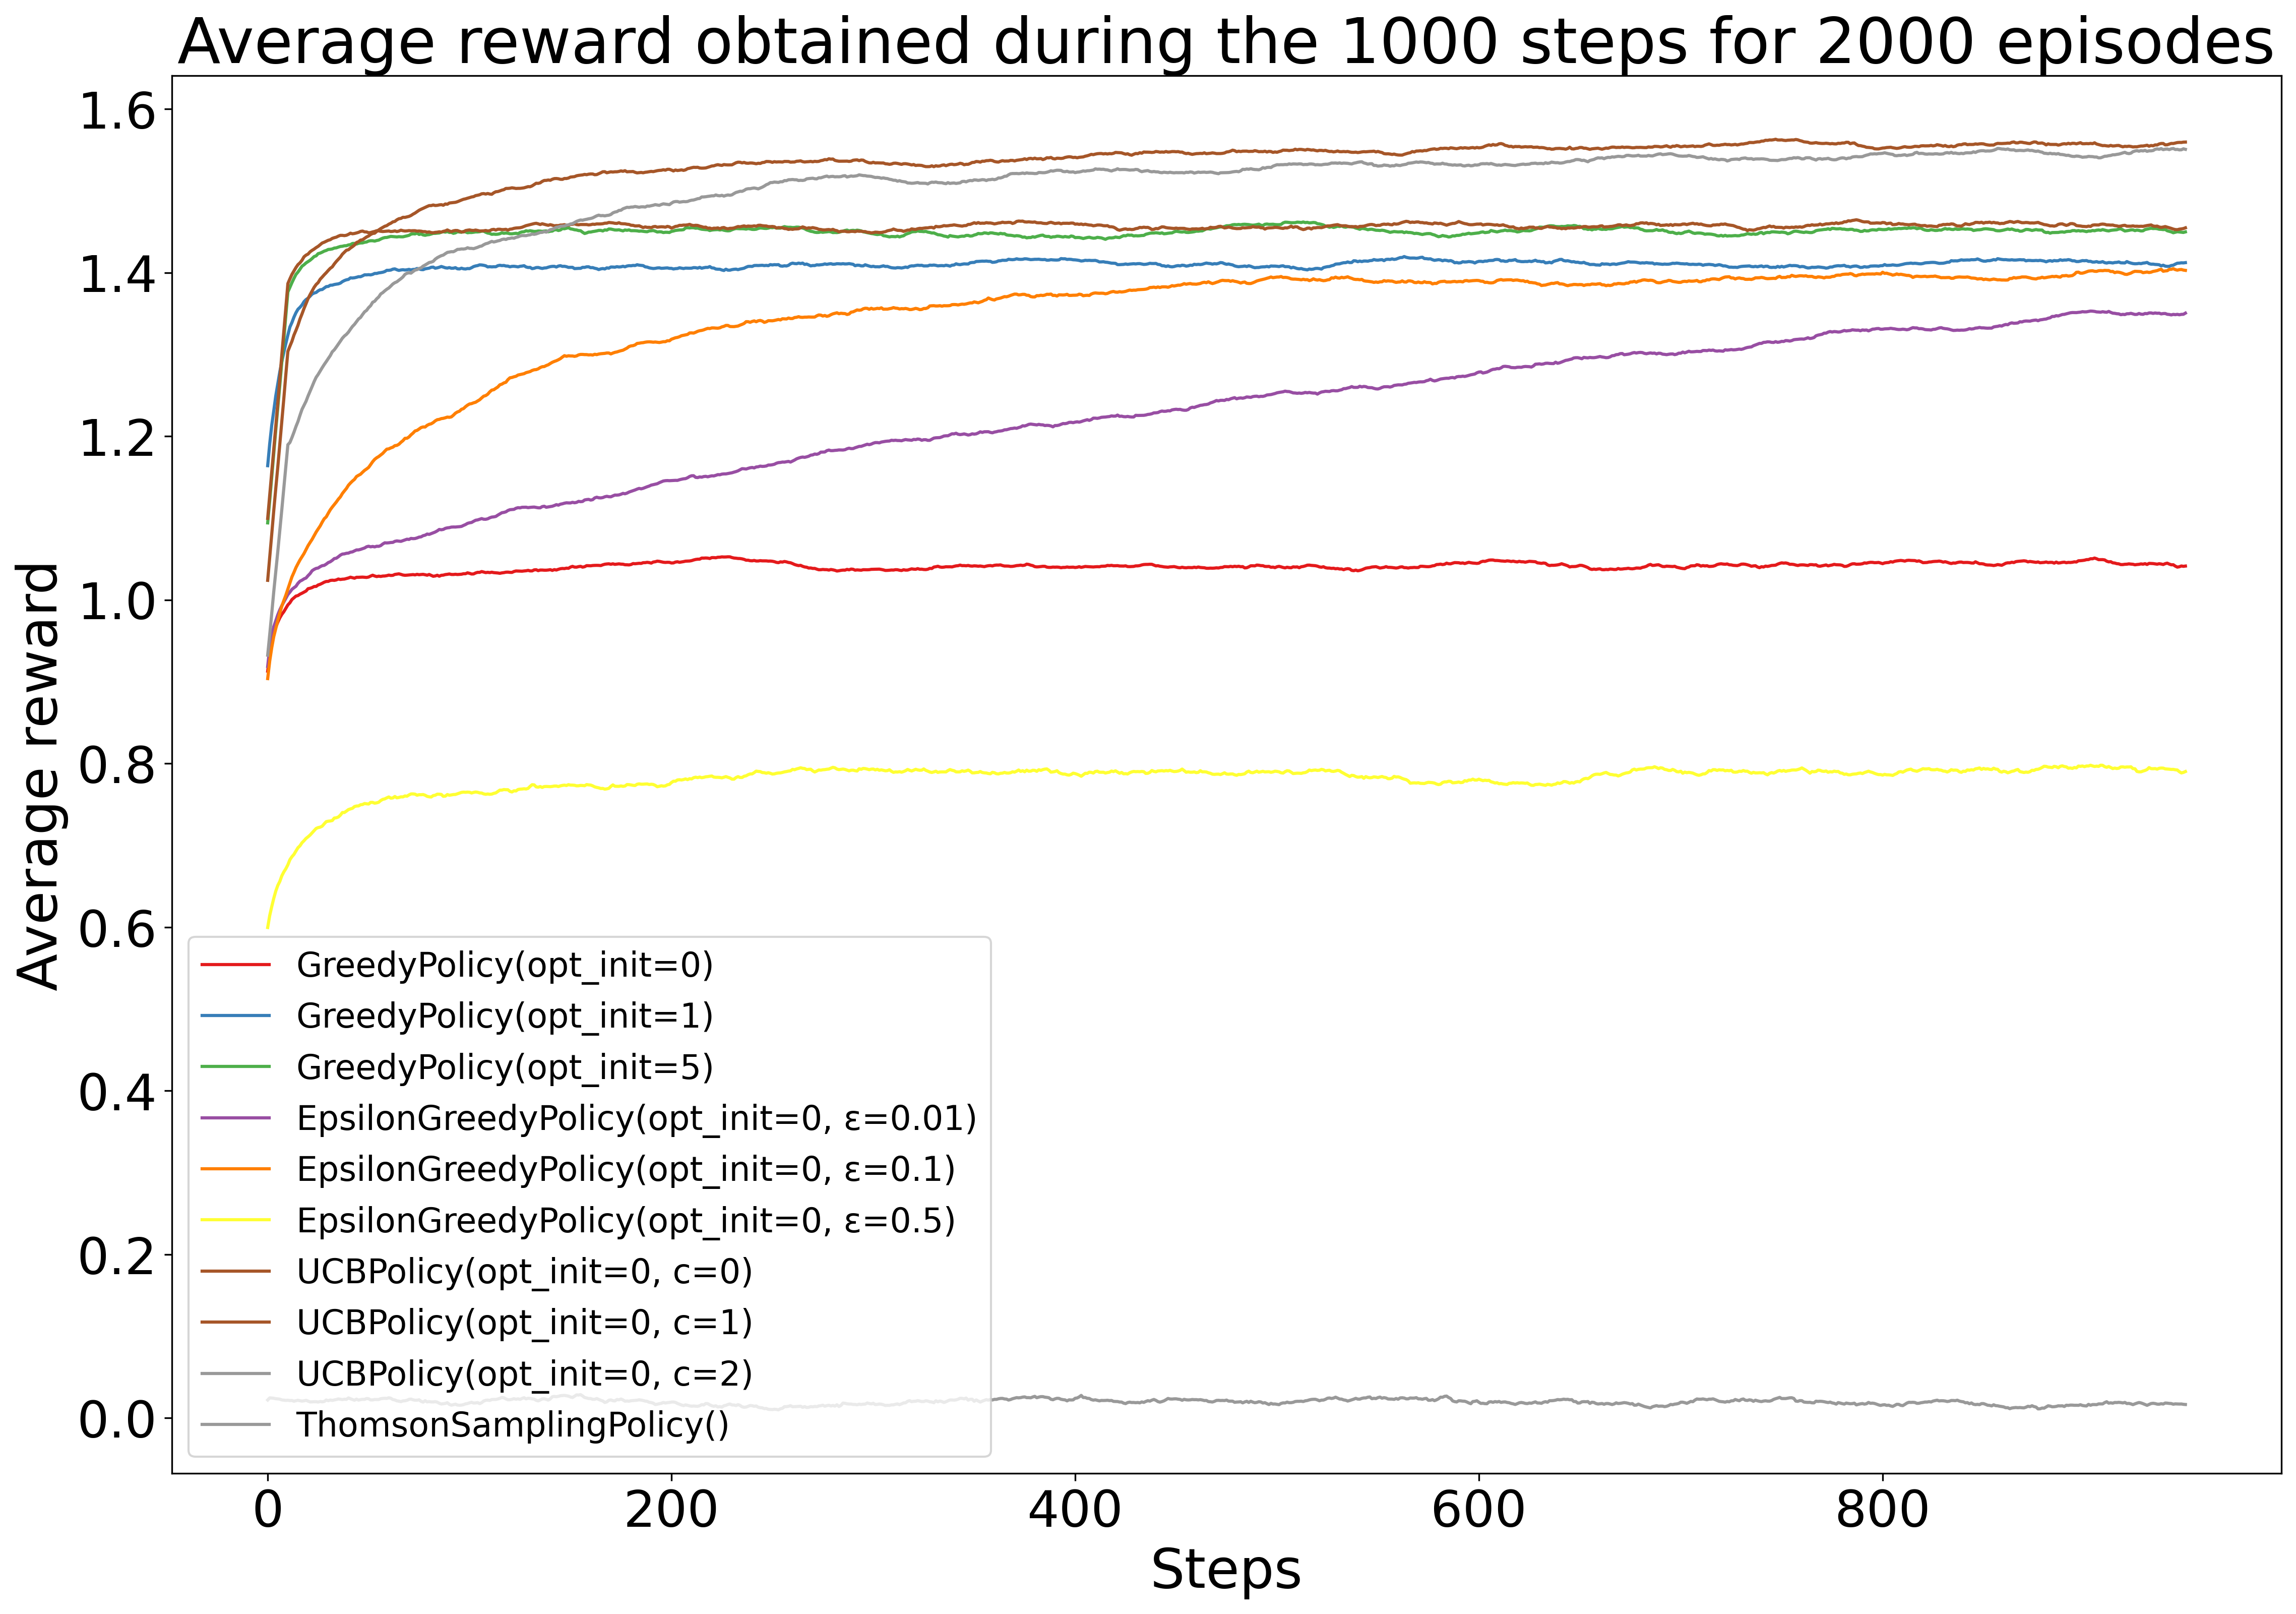

In [4]:
game.plot_average_reward_by_step_smoothed()

* **Greedy policy without optimistic initialization** behaves similarly to **UCB with c = 0**. This is because, if c = 0, there is no encouragement for exploration, meanining that after initialization, it will always choose the action with the highest estimated reward.

In [ ]:
game.plot_rate_optimal_actions_by_step()